In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Generating data using Numpy 

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1],
                  [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1],
                  [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


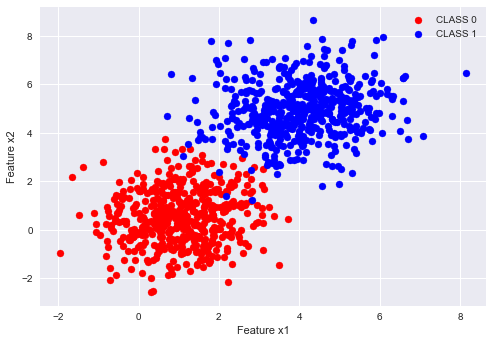

In [3]:
plt.style.use('seaborn')

plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'red', label = 'CLASS 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'blue', label = 'CLASS 1')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()

plt.show()

In [4]:
data = np.zeros((1000, 3))

In [5]:
data[:500, :2] = dist_01
data[500:, :2] = dist_02

data[500:, -1] = 1.0

In [6]:
# randomly shuffle data
np.random.shuffle(data)
print(data[:10])

[[ 1.44379007 -1.47132711  0.        ]
 [ 0.12256897 -0.00700395  0.        ]
 [ 2.17347134  6.22530119  1.        ]
 [-0.10107293  0.02226598  0.        ]
 [ 1.3984479  -0.31236697  0.        ]
 [ 3.198136    4.27961793  1.        ]
 [ 3.99506918  4.05508936  1.        ]
 [ 0.42787308  0.49544516  0.        ]
 [ 3.94505556  6.12425091  1.        ]
 [ 4.0868072   3.48572347  1.        ]]


In [7]:
# divide the data into train and test part
split = int(0.8*data.shape[0])
X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


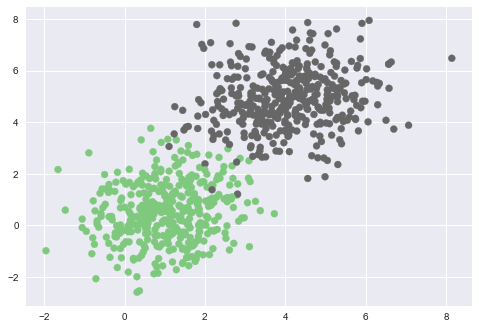

In [8]:
# plot training data and Normalization
plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train, cmap = plt.cm.Accent)
plt.show()

In [9]:
print(Y_test)

[0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1.]


# 2) Data Normalization

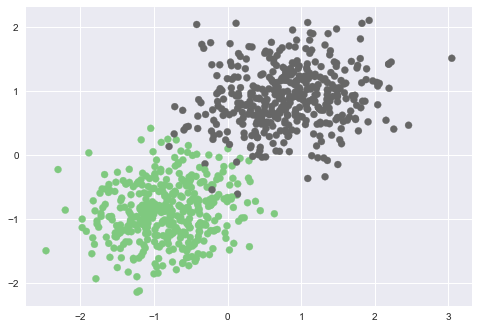

In [10]:
# data noramlization
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

# apply the transformation
X_train = (X_train-x_mean)/x_std

# apply the same transformation 
X_test = (X_test - x_mean)/x_std

plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train, cmap = plt.cm.Accent)
plt.show()

In [11]:
X_train.mean(axis = 0)

array([ 4.23758251e-16, -4.58695582e-16])

In [12]:
X_train.std(axis = 0)

array([1., 1.])

# 3) Logistic Implementaion

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    '''
    X = entire array(m, n+1)
    theta = np.array(n+1,1)
    '''
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    '''
    params:
    X - (m, n+1)
    Y - (m, 1)
    theta - (n+1, 1)
    
    return:
       scale_value = loss
    '''
    hi = hypothesis(X, theta)
    e = -1*np.mean((y*np.log(hi) + ((1 - y)*np.log(1-hi))))
    
    return e

In [14]:
'''# plotting sigmoid function
plt.style.use('dark_background')
a = np.linspace(-10, 10, 20)
plt.scatter(a, sigmoid(a), color = 'white')
plt.plot(a, sigmoid(a), color = 'yellow')
plt.show()'''

"# plotting sigmoid function\nplt.style.use('dark_background')\na = np.linspace(-10, 10, 20)\nplt.scatter(a, sigmoid(a), color = 'white')\nplt.plot(a, sigmoid(a), color = 'yellow')\nplt.show()"

# 4)

In [15]:
def gradient(X, y, theta):
    '''
    params:
    X - (m, n+1)
    Y - (m, 1)
    theta - (n+1, 1)
    
    return:
       gradient_vector - (n+1, 1)
    '''
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hi))
    m = X.shape[0]
    return grad/m

# optimal values of theta
def gradient_descent(X, y, lr = 0.1, max_itr = 500):
    
    n = X.shape[1]
    theta = np.zeros((n, 1))
    
    error_list = []
    
    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # update
        theta = theta - lr*grad
        
    return (theta, error_list)

In [16]:
ones = np.ones((X_train.shape[0], 1))
X_New_train = np.hstack((ones, X_train))
print(X_New_train.shape)
print(X_New_train)

Y_train = Y_train.reshape((-1, 1))

(800, 3)
[[ 1.         -0.6123224  -1.6921378 ]
 [ 1.         -1.33356225 -1.10257363]
 [ 1.         -0.21399754  1.40667016]
 ...
 [ 1.          0.07848699 -0.81855535]
 [ 1.          1.0881097   2.06440874]
 [ 1.         -0.30943344 -0.23100463]]


In [17]:
theta, error_list = gradient_descent(X_New_train, Y_train)

# Here is the error it is not showing the correct graph of error

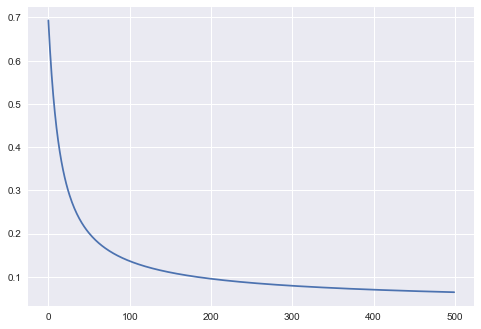

In [18]:
plt.plot(error_list)
plt.show()

In [19]:
theta

array([[0.10640381],
       [2.1720787 ],
       [2.84901694]])

In [20]:
X_train.shape

(800, 2)

In [21]:
Y_train.shape

(800, 1)

# 5) Visualise Decision Surface

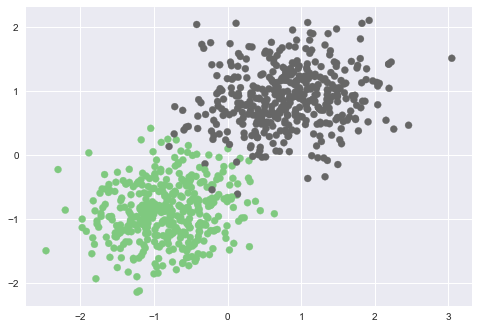

In [22]:
plt.style.use('seaborn')
plt.scatter(X_train[:, 0], X_train[:,1], c=Y_train.reshape((-1,)), cmap = plt.cm.Accent)
plt.show()

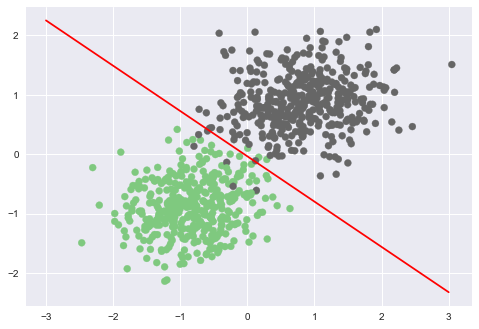

In [23]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + theta[1] * x1)/theta[2]

plt.plot(x1, x2, color = 'red')
plt.scatter(X_train[:, 0], X_train[:,1], c=Y_train.reshape((-1,)), cmap = plt.cm.Accent)

plt.show()

# 6) Predictions & Accuracy

In [24]:
X_New_Test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_New_Test.shape)
print(X_New_Test[:3,:])

(200, 3)
[[ 1.         -0.8292049  -1.50758463]
 [ 1.         -0.4343618  -0.47765198]
 [ 1.          0.10297571  0.65396582]]


In [25]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)
    
    output[h>=0.5] = 1
    output = output.astype('int')
    
    return output

XT_preds = predict(X_New_train, theta)
Xt_preds = predict(X_New_Test, theta)

XT_preds = predict(X_New_train, theta)
Xt_preds = predict(X_New_Test, theta)

In [26]:
def accuracy(actual, preds):
    
    actual = actual.astype('int')
    actual = actual.reshape((-1, 1))
    
    acc = np.sum(actual == preds)/actual.shape[0]
    
    return acc*100

In [27]:
train_acc = accuracy(Y_train, XT_preds)
test_acc = accuracy(Y_test, Xt_preds)

print(train_acc)
print(test_acc)

98.875
100.0
